# TRIPURA

In [605]:
import pandas as pd

# Load the datasets for Tripura
df_tr_enrolment = pd.read_csv('/content/Tripura Enrolment Dataset.csv')
df_tr_demographic = pd.read_csv('/content/Tripura Demographic Dataset.csv')
df_tr_biometric = pd.read_csv('/content/Tripura Biometric Dataset.csv')

print("Tripura Enrolment Dataset:")
print(df_tr_enrolment.head())
print(df_tr_enrolment.info())
print(df_tr_enrolment.describe())

print("\nTripura Demographic Dataset:")
print(df_tr_demographic.head())
print(df_tr_demographic.info())
print(df_tr_demographic.describe())

print("\nTripura Biometric Dataset:")
print(df_tr_biometric.head())
print(df_tr_biometric.info())
print(df_tr_biometric.describe())

Tripura Enrolment Dataset:
         date    state    district  pincode  age_0_5  age_5_17  age_18_greater
0  01-07-2025  Tripura  Sepahijala   799102      166       144              15
1  03-09-2025  Tripura      Dhalai   799264        2         0               0
2  03-09-2025  Tripura      Dhalai   799275        2         1               0
3  03-09-2025  Tripura      Gomati   799013        2         1               0
4  03-09-2025  Tripura      Khowai   799203        1         0               0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            4596 non-null   object
 1   state           4596 non-null   object
 2   district        4596 non-null   object
 3   pincode         4596 non-null   int64 
 4   age_0_5         4596 non-null   int64 
 5   age_5_17        4596 non-null   int64 
 6   age_18_greater  4596 non-null   int6

In [606]:
df_tr_enrolment['date'] = pd.to_datetime(df_tr_enrolment['date'], format='%d-%m-%Y')
df_tr_demographic['date'] = pd.to_datetime(df_tr_demographic['date'], format='%d-%m-%Y')
df_tr_biometric['date'] = pd.to_datetime(df_tr_biometric['date'], format='%d-%m-%Y')

print("Data types after conversion for df_tr_enrolment:")
print(df_tr_enrolment.info())
print("\nData types after conversion for df_tr_demographic:")
print(df_tr_demographic.info())
print("\nData types after conversion for df_tr_biometric:")
print(df_tr_biometric.info())

Data types after conversion for df_tr_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            4596 non-null   datetime64[ns]
 1   state           4596 non-null   object        
 2   district        4596 non-null   object        
 3   pincode         4596 non-null   int64         
 4   age_0_5         4596 non-null   int64         
 5   age_5_17        4596 non-null   int64         
 6   age_18_greater  4596 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 251.5+ KB
None

Data types after conversion for df_tr_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10465 entries, 0 to 10464
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           10465 non-null  dat

In [607]:
merged_tr_df_temp = pd.merge(df_tr_enrolment, df_tr_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_tr_merged = pd.merge(merged_tr_df_temp, df_tr_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numerical columns for NaN filling
numeric_cols = df_tr_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numerical columns with 0
df_tr_merged[numeric_cols] = df_tr_merged[numeric_cols].fillna(0)

print("Merged Tripura DataFrame (df_tr_merged) head:")
print(df_tr_merged.head())
print("\nMerged Tripura DataFrame (df_tr_merged) info:")
print(df_tr_merged.info())
print("\nMerged Tripura DataFrame (df_tr_merged) describe:")
print(df_tr_merged.describe())

Merged Tripura DataFrame (df_tr_merged) head:
        date    state district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Tripura   Dhalai   799204      0.0       0.0             0.0   
1 2025-03-01  Tripura   Dhalai   799264      0.0       0.0             0.0   
2 2025-03-01  Tripura   Dhalai   799273      0.0       0.0             0.0   
3 2025-03-01  Tripura   Dhalai   799275      0.0       0.0             0.0   
4 2025-03-01  Tripura   Dhalai   799278      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0            0.0           0.0         203.0         74.0  
1            0.0           0.0          77.0        127.0  
2           29.0         359.0        1023.0        780.0  
3           47.0         504.0         383.0        344.0  
4           29.0         496.0         306.0        152.0  

Merged Tripura DataFrame (df_tr_merged) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28610 entries, 0 to 28609
Da

In [608]:
df_tr = df_tr_merged[df_tr_merged['state'] == 'Tripura'].copy()
df_tr['year'] = df_tr['date'].dt.year
df_tr['month'] = df_tr['date'].dt.month

print("Shape of df_tr:", df_tr.shape)
print("\nFirst 5 rows of df_tr with new 'year' and 'month' columns:")
print(df_tr.head())

Shape of df_tr: (28610, 13)

First 5 rows of df_tr with new 'year' and 'month' columns:
        date    state district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Tripura   Dhalai   799204      0.0       0.0             0.0   
1 2025-03-01  Tripura   Dhalai   799264      0.0       0.0             0.0   
2 2025-03-01  Tripura   Dhalai   799273      0.0       0.0             0.0   
3 2025-03-01  Tripura   Dhalai   799275      0.0       0.0             0.0   
4 2025-03-01  Tripura   Dhalai   799278      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  year  month  
0            0.0           0.0         203.0         74.0  2025      3  
1            0.0           0.0          77.0        127.0  2025      3  
2           29.0         359.0        1023.0        780.0  2025      3  
3           47.0         504.0         383.0        344.0  2025      3  
4           29.0         496.0         306.0        152.0  2025      3  


In [609]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_tr_agg = df_tr.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated DataFrame (df_tr_agg) head:")
print(df_tr_agg.head())
print("\nAggregated DataFrame (df_tr_agg) info:")
print(df_tr_agg.info())

Aggregated DataFrame (df_tr_agg) head:
   year  month    state       district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Tripura         Dhalai      0.0       0.0             0.0   
1  2025      3  Tripura      Dhalai  *      0.0       0.0             0.0   
2  2025      3  Tripura         Gomati      0.0       0.0             0.0   
3  2025      3  Tripura         Khowai      0.0       0.0             0.0   
4  2025      3  Tripura  North Tripura      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0          256.0        3675.0        4853.0       2723.0  
1            0.0           0.0          30.0         72.0  
2          388.0        3026.0        2597.0        579.0  
3           84.0        1096.0        1656.0        412.0  
4          290.0        3450.0        5036.0       4245.0  

Aggregated DataFrame (df_tr_agg) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 colum

In [610]:
import numpy as np

# 1. Create 'totalenrolments' column
df_tr_agg['totalenrolments'] = df_tr_agg['age_0_5'] + df_tr_agg['age_5_17'] + df_tr_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_tr_agg['childenrolments'] = df_tr_agg['age_0_5'] + df_tr_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_tr_agg['totaldemoupdates'] = df_tr_agg['demo_age_5_17'] + df_tr_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_tr_agg['totalbioupdates'] = df_tr_agg['bio_age_5_17'] + df_tr_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_tr_agg['CES'] = np.where(
    df_tr_agg['totalenrolments'] == 0,
    0,
    df_tr_agg['childenrolments'] / df_tr_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_tr_agg['DUR'] = np.where(
    df_tr_agg['totalenrolments'] == 0,
    0,
    df_tr_agg['totaldemoupdates'] / df_tr_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_tr_agg['BUR'] = np.where(
    df_tr_agg['totalenrolments'] == 0,
    0,
    df_tr_agg['totalbioupdates'] / df_tr_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_tr_agg) with new metrics head:")
print(df_tr_agg.head())

Aggregated DataFrame (df_tr_agg) with new metrics head:
   year  month    state       district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Tripura         Dhalai      0.0       0.0             0.0   
1  2025      3  Tripura      Dhalai  *      0.0       0.0             0.0   
2  2025      3  Tripura         Gomati      0.0       0.0             0.0   
3  2025      3  Tripura         Khowai      0.0       0.0             0.0   
4  2025      3  Tripura  North Tripura      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0          256.0        3675.0        4853.0       2723.0              0.0   
1            0.0           0.0          30.0         72.0              0.0   
2          388.0        3026.0        2597.0        579.0              0.0   
3           84.0        1096.0        1656.0        412.0              0.0   
4          290.0        3450.0        5036.0       4245.0              0.0   

   childenro

In [611]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_tr_agg['Enorm'] = df_tr_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_tr_agg['Dnorm'] = df_tr_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', 'month' and 'state'
df_tr_agg['Bnorm'] = df_tr_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_tr_agg['stdnorm'] = (df_tr_agg['Enorm'] + df_tr_agg['Dnorm'] + df_tr_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_tr_agg['ALBI'] = 1 - df_tr_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_tr_agg['ALBI'] = df_tr_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_tr_agg) with normalized metrics and ALBI head:")
print(df_tr_agg.head())

Aggregated DataFrame (df_tr_agg) with normalized metrics and ALBI head:
   year  month    state       district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Tripura         Dhalai      0.0       0.0             0.0   
1  2025      3  Tripura      Dhalai  *      0.0       0.0             0.0   
2  2025      3  Tripura         Gomati      0.0       0.0             0.0   
3  2025      3  Tripura         Khowai      0.0       0.0             0.0   
4  2025      3  Tripura  North Tripura      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0          256.0        3675.0        4853.0  ...            3931.0   
1            0.0           0.0          30.0  ...               0.0   
2          388.0        3026.0        2597.0  ...            3414.0   
3           84.0        1096.0        1656.0  ...            1180.0   
4          290.0        3450.0        5036.0  ...            3740.0   

   totalbioupdates  CES  DUR  BUR  Eno

In [612]:
df_tr_agg['Enormrisk'] = 1 - df_tr_agg['Enorm']
df_tr_agg['CESrisknorm'] = 1 - df_tr_agg['CES']
df_tr_agg['DURrisknorm'] = 1 - df_tr_agg['DUR']
df_tr_agg['BURrisknorm'] = 1 - df_tr_agg['BUR']
df_tr_agg['ALBIrisknorm'] = 1 - df_tr_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_tr_agg['riskscore'] = (
    df_tr_agg['Enormrisk'] +
    df_tr_agg['CESrisknorm'] +
    df_tr_agg['DURrisknorm'] +
    df_tr_agg['BURrisknorm'] +
    df_tr_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_tr_agg) with risk components and riskscore head:")
print(df_tr_agg.head())

Aggregated DataFrame (df_tr_agg) with risk components and riskscore head:
   year  month    state       district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Tripura         Dhalai      0.0       0.0             0.0   
1  2025      3  Tripura      Dhalai  *      0.0       0.0             0.0   
2  2025      3  Tripura         Gomati      0.0       0.0             0.0   
3  2025      3  Tripura         Khowai      0.0       0.0             0.0   
4  2025      3  Tripura  North Tripura      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0          256.0        3675.0        4853.0  ...  0.233003  0.382300   
1            0.0           0.0          30.0  ...  0.000000  0.001071   
2          388.0        3026.0        2597.0  ...  0.202359  0.157868   
3           84.0        1096.0        1656.0  ...  0.069943  0.101352   
4          290.0        3450.0        5036.0  ...  0.221682  0.469268   

    stdnorm      ALBI  E

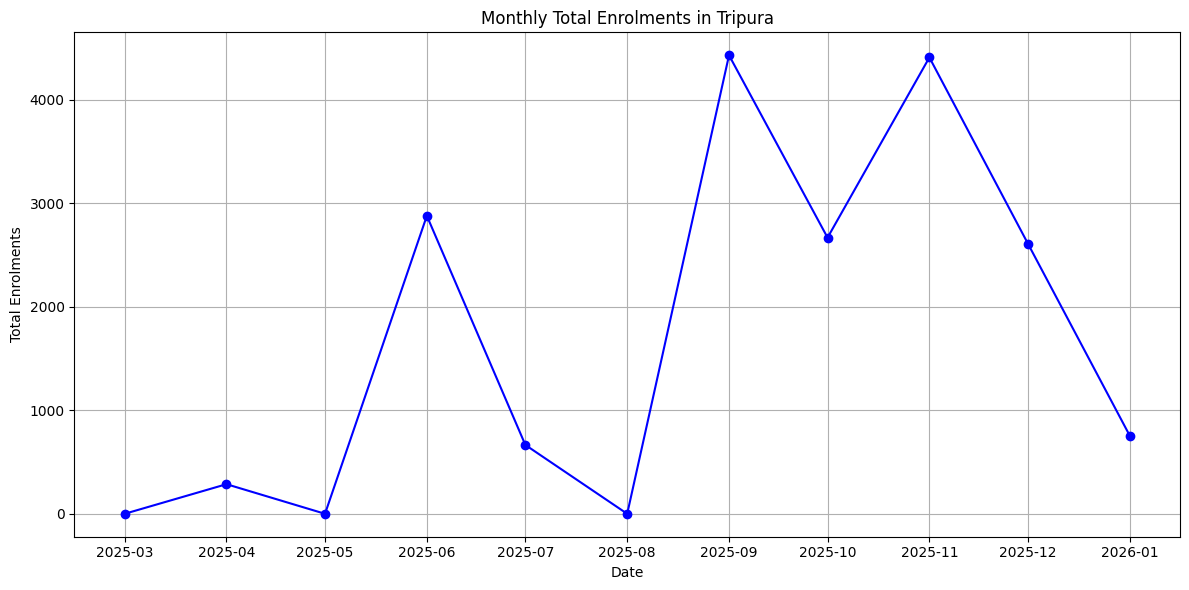

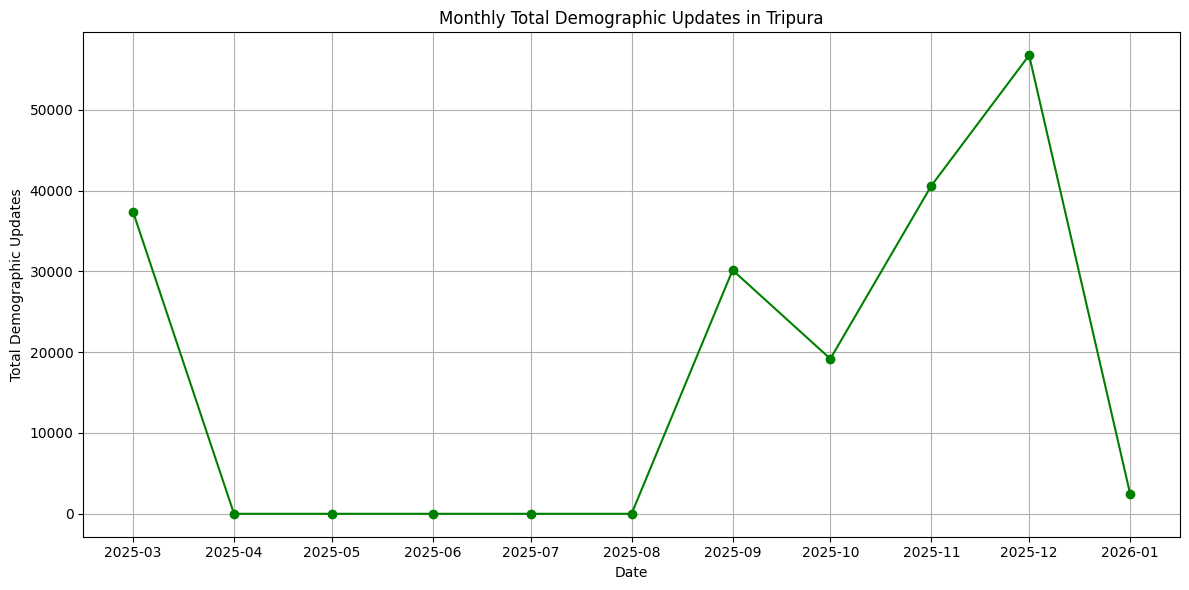

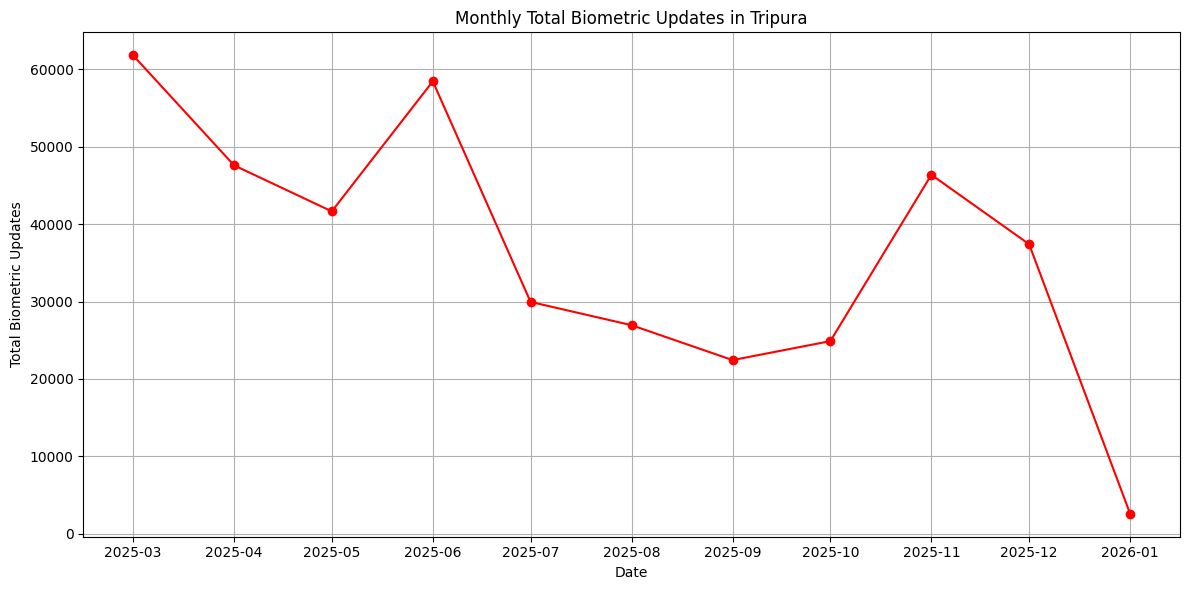

Monthly trend plots generated successfully.


In [613]:
import matplotlib.pyplot as plt

df_tr_monthly_trends = df_tr_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_tr_monthly_trends['date'] = pd.to_datetime(df_tr_monthly_trends['year'].astype(str) + '-' + df_tr_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_tr_monthly_trends = df_tr_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_tr_monthly_trends['date'], df_tr_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Tripura')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_tr_monthly_trends['date'], df_tr_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Tripura')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_tr_monthly_trends['date'], df_tr_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Tripura')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

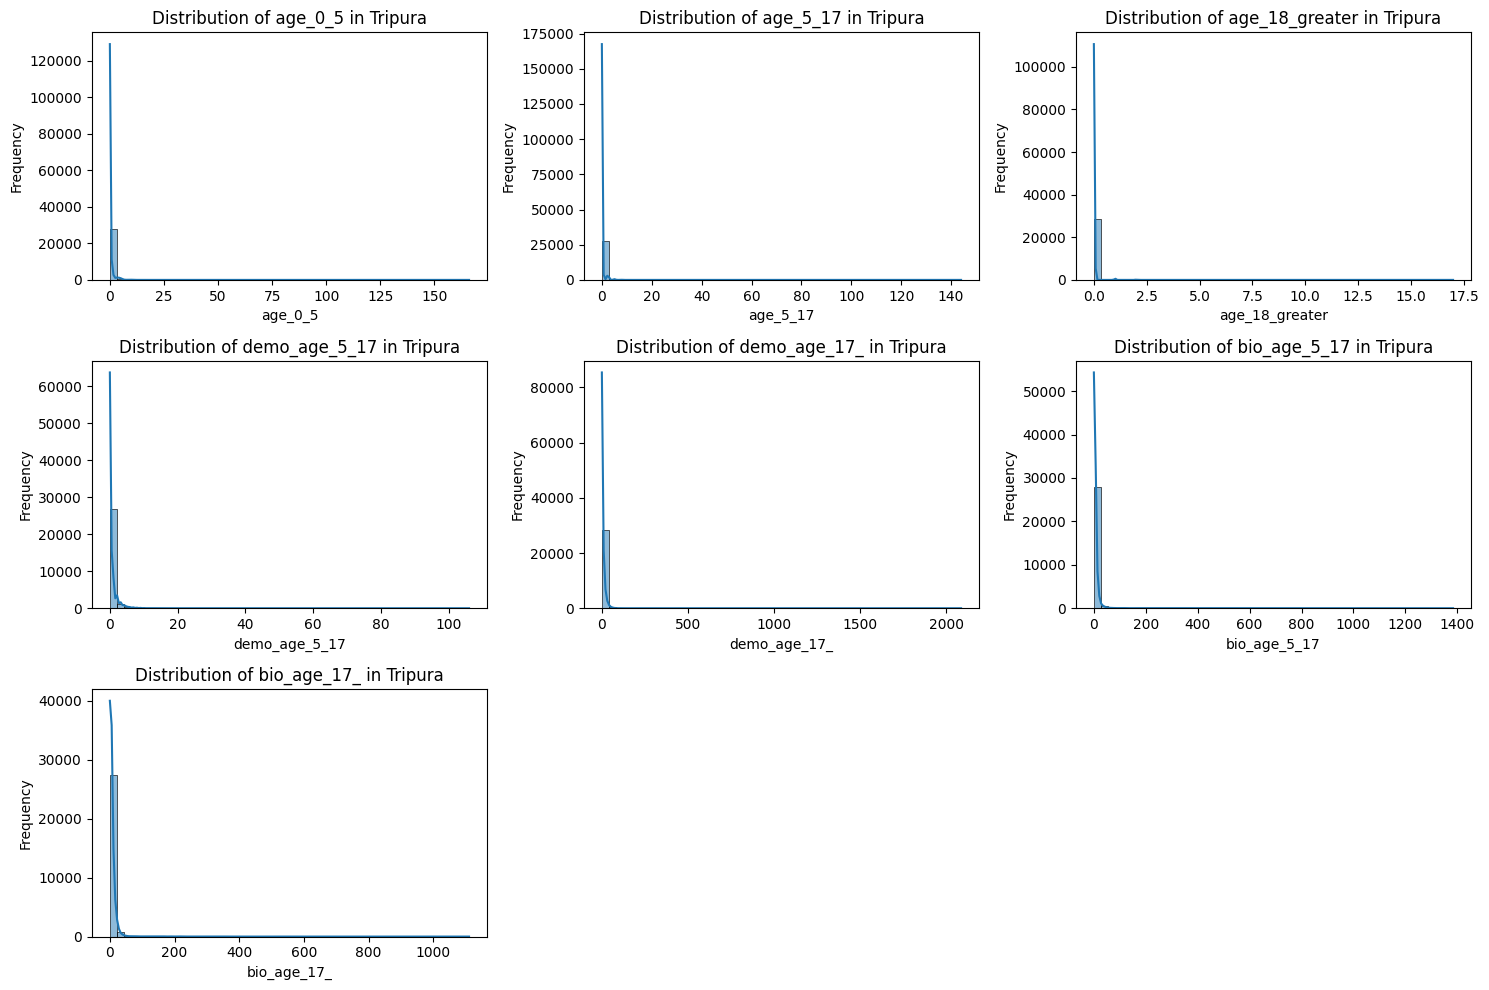

Histograms for numerical age-related columns displayed for Tripura.


In [614]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_age_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_tr_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Tripura')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms for numerical age-related columns displayed for Tripura.")

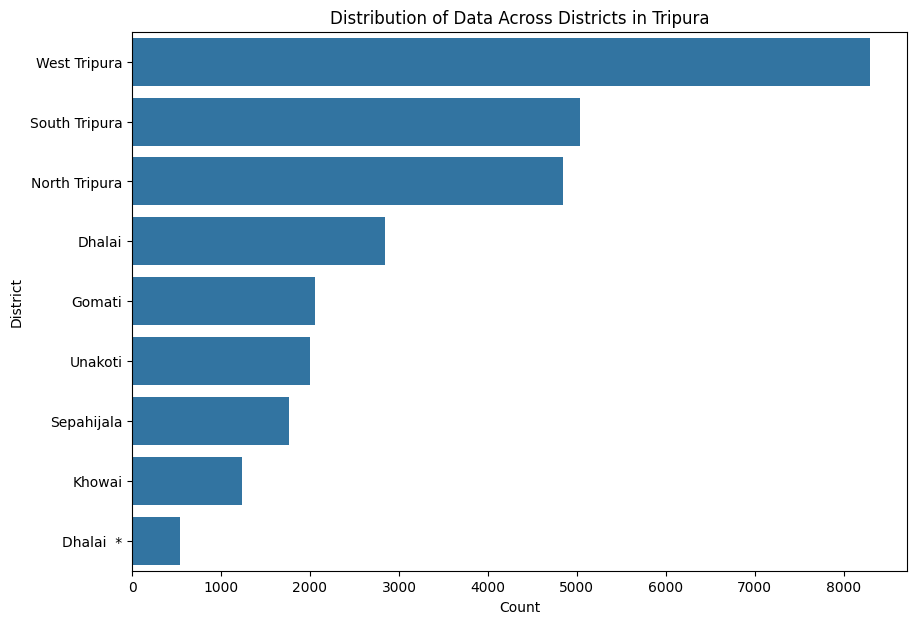

Count plot for 'district' displayed for Tripura.


In [615]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.countplot(data=df_tr_merged, y='district', order=df_tr_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Tripura')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Count plot for 'district' displayed for Tripura.")

**Bivariate and Trivarite Analysis**

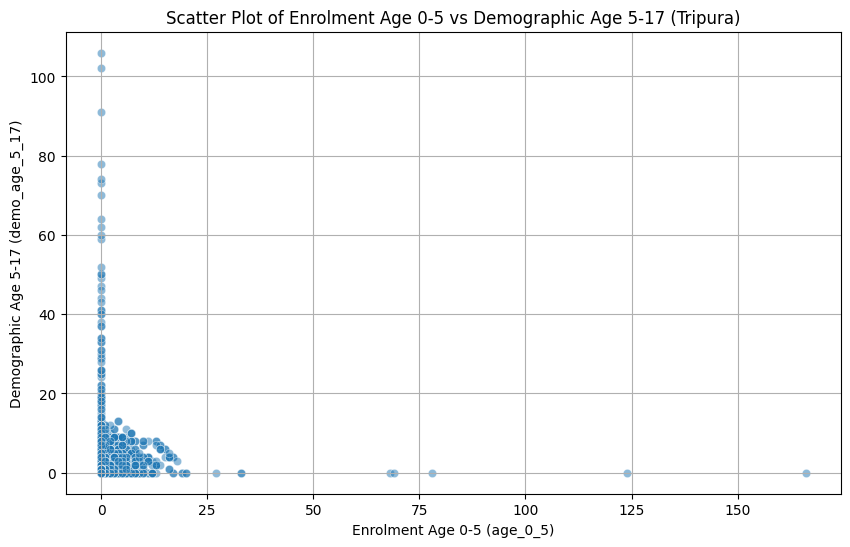

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Tripura.


In [616]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tr_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Tripura)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Tripura.")

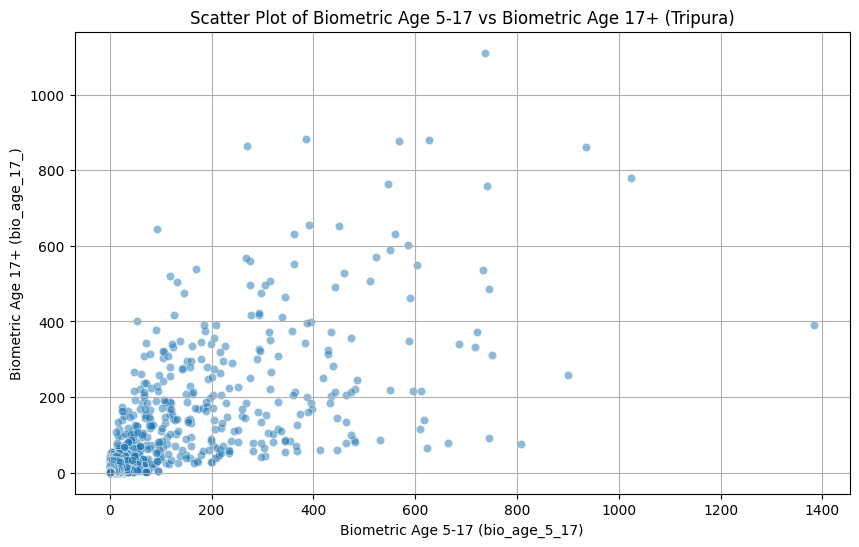

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Tripura.


In [617]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tr_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Tripura)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Tripura.")

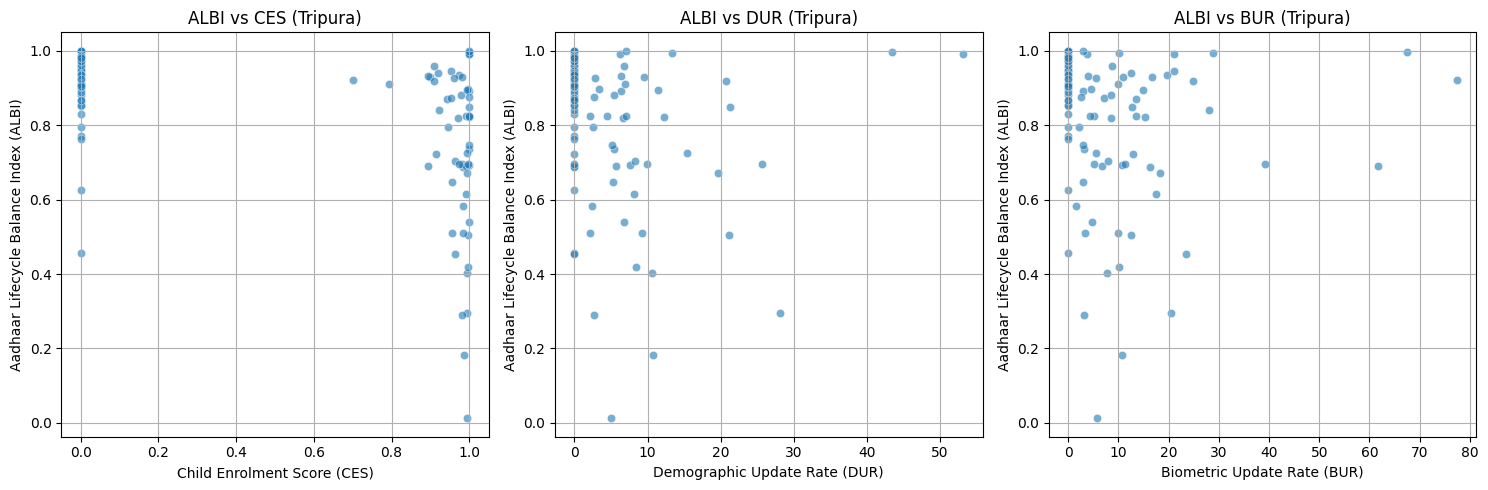

In [626]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Scatter plot for ALBI vs CES
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_tr_agg, x='CES', y='ALBI', alpha=0.6)
plt.title('ALBI vs CES (Tripura)')
plt.xlabel('Child Enrolment Score (CES)')
plt.ylabel('Aadhaar Lifecycle Balance Index (ALBI)')
plt.grid(True)

# Scatter plot for ALBI vs DUR
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_tr_agg, x='DUR', y='ALBI', alpha=0.6)
plt.title('ALBI vs DUR (Tripura)')
plt.xlabel('Demographic Update Rate (DUR)')
plt.ylabel('Aadhaar Lifecycle Balance Index (ALBI)')
plt.grid(True)

# Scatter plot for ALBI vs BUR
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_tr_agg, x='BUR', y='ALBI', alpha=0.6)
plt.title('ALBI vs BUR (Tripura)')
plt.xlabel('Biometric Update Rate (BUR)')
plt.ylabel('Aadhaar Lifecycle Balance Index (ALBI)')
plt.grid(True)

plt.tight_layout()
plt.show()

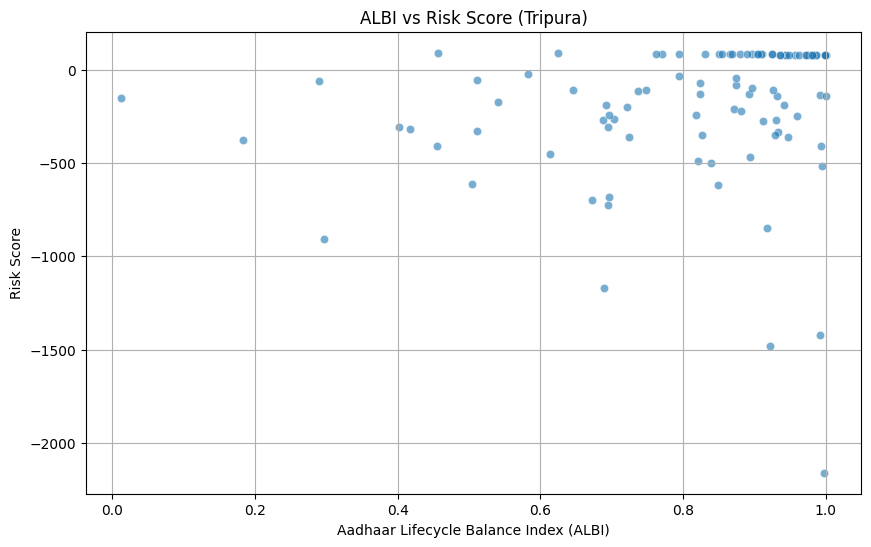

In [627]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tr_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Risk Score (Tripura)')
plt.xlabel('Aadhaar Lifecycle Balance Index (ALBI)')
plt.ylabel('Risk Score')
plt.grid(True)
plt.show()

Correlation Matrix for Tripura:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.793182        0.590743       0.077231   
age_5_17        0.793182  1.000000        0.606858       0.050856   
age_18_greater  0.590743  0.606858        1.000000       0.002253   
demo_age_5_17   0.077231  0.050856        0.002253       1.000000   
demo_age_17_    0.055600  0.032588        0.001119       0.791827   
bio_age_5_17    0.035193  0.026257        0.072920       0.532440   
bio_age_17_     0.027167  0.018290        0.037987       0.385518   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.055600      0.035193     0.027167  
age_5_17            0.032588      0.026257     0.018290  
age_18_greater      0.001119      0.072920     0.037987  
demo_age_5_17       0.791827      0.532440     0.385518  
demo_age_17_        1.000000      0.535615     0.481860  
bio_age_5_17        0.535615      1.000000     0.760780  
bio_age_1

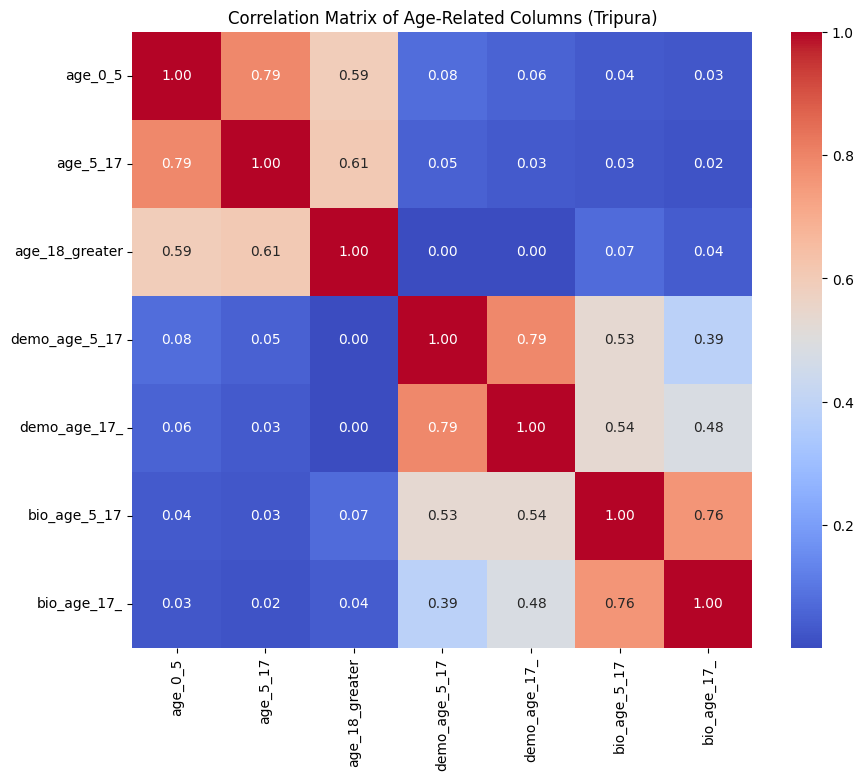

Correlation matrix heatmap for age-related columns displayed for Tripura.


In [618]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_tr = df_tr_merged[numerical_age_cols].corr()

print("Correlation Matrix for Tripura:")
print(correlation_matrix_tr)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_tr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Tripura)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Tripura.")

In [619]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_tr_district_mean = df_tr_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data for Tripura:")
print(df_tr_district_mean.head())
print(df_tr_district_mean.info())

District-wise average age-related data for Tripura:
        district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0         Dhalai  0.435042  0.383778        0.028792       0.683989   
1      Dhalai  *  0.077206  0.018382        0.000000       0.033088   
2         Gomati  0.333333  0.172027        0.013645       0.905458   
3         Khowai  0.247381  0.164384        0.053183       0.618856   
4  North Tripura  0.374587  0.168595        0.008264       0.268388   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0      7.113764      9.166784     7.238764  
1      1.259191      0.564338     1.854779  
2      5.242203      7.134016     2.664717  
3      3.726027      7.730056     2.918614  
4      3.944008      5.938017     7.543388  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        9 non-null      object 
 1   age_0_5    

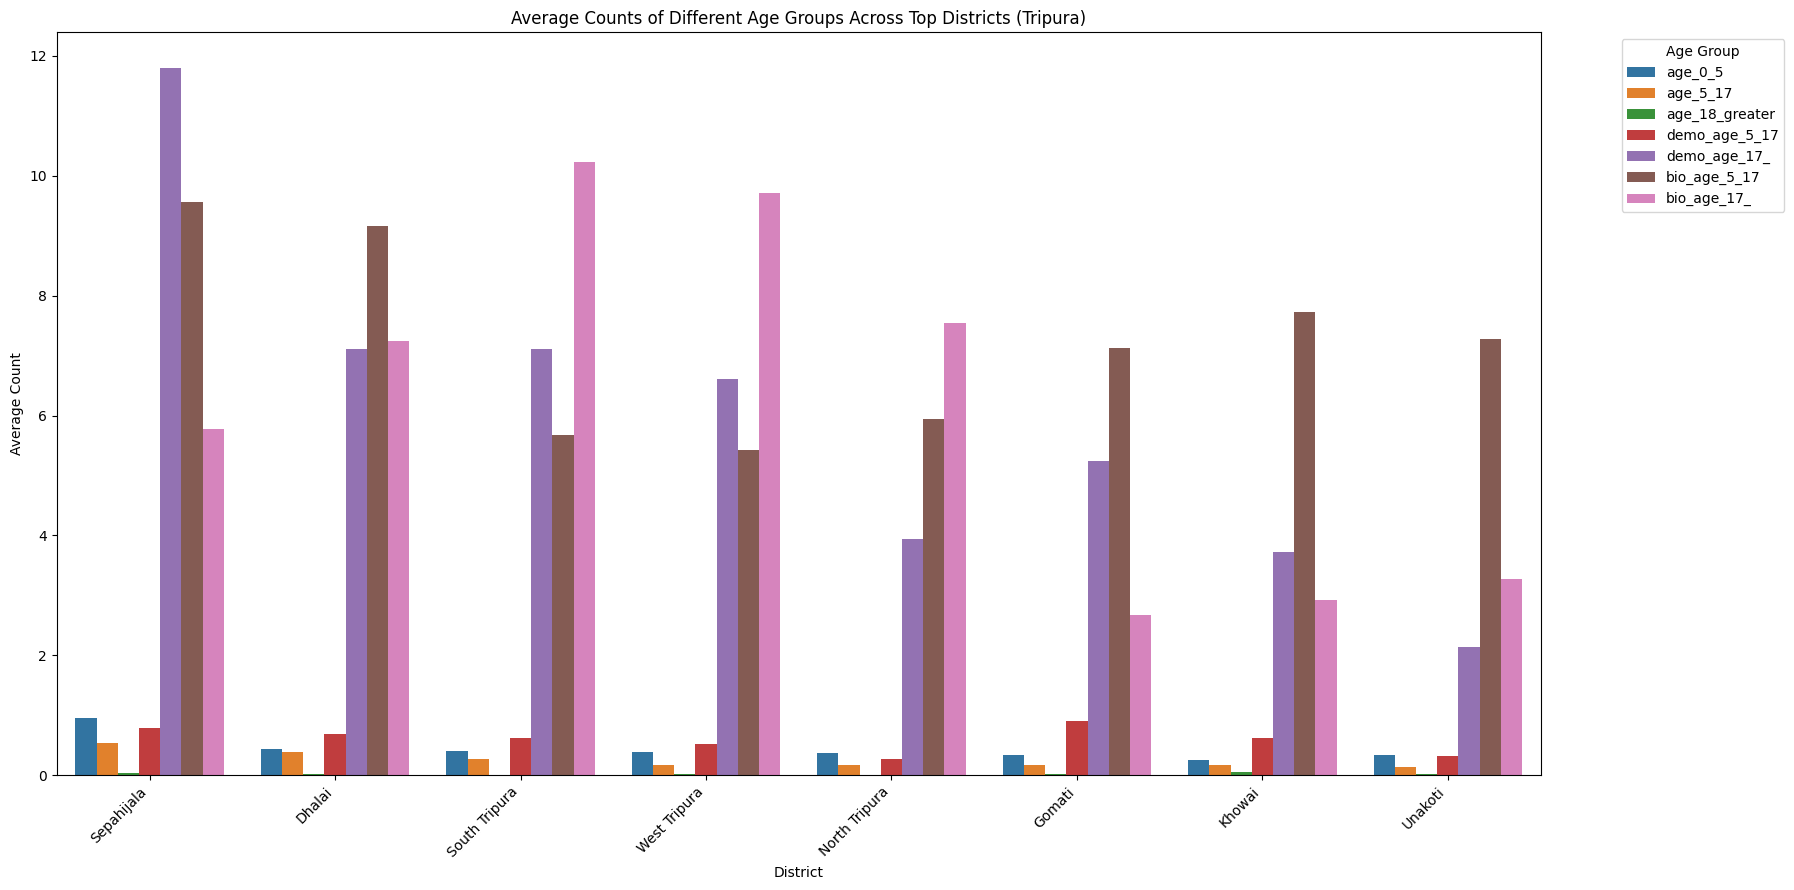

Insight: The grouped bar chart reveals the relative contribution of different age groups to the total average age counts in the top districts of Tripura, showing which districts have higher overall activity and how it's distributed across age categories.


In [620]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_tr_district_mean['total_avg_age'] = df_tr_district_mean[age_cols_to_group].sum(axis=1)
df_tr_district_mean_top10 = df_tr_district_mean.nlargest(8, 'total_avg_age') # Tripura has 8 distinct districts after aggregation

df_tr_district_mean_melted = df_tr_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_tr_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top Districts (Tripura)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart reveals the relative contribution of different age groups to the total average age counts in the top districts of Tripura, showing which districts have higher overall activity and how it's distributed across age categories.")

In [621]:
df_tr_district_mean['total_avg_age'] = df_tr_district_mean[age_cols_to_group].sum(axis=1)
df_tr_district_mean_top10 = df_tr_district_mean.nlargest(8, 'total_avg_age') # Tripura has 8 distinct districts after aggregation

print("Top districts by total average age-related counts in Tripura:")
print(df_tr_district_mean_top10[['district', 'total_avg_age']])

Top districts by total average age-related counts in Tripura:
        district  total_avg_age
5     Sepahijala      29.443750
0         Dhalai      25.050913
6  South Tripura      24.325318
8   West Tripura      22.844503
4  North Tripura      18.245248
2         Gomati      16.465400
3         Khowai      15.458501
7        Unakoti      13.500751


Time-series aggregated data (sum of age-related columns per date) for Tripura:
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0         2404.0       34975.0   
1 2025-04-01    165.0      81.0            40.0            0.0           0.0   
2 2025-05-01      0.0       0.0             0.0            0.0           0.0   
3 2025-05-20      0.0       0.0             0.0            0.0           0.0   
4 2025-05-21      0.0       0.0             0.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0       33715.0      28124.0  
1       27603.0      20012.0  
2       13829.0      16140.0  
3         565.0        970.0  
4         352.0        562.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            231 non-null    datetime6

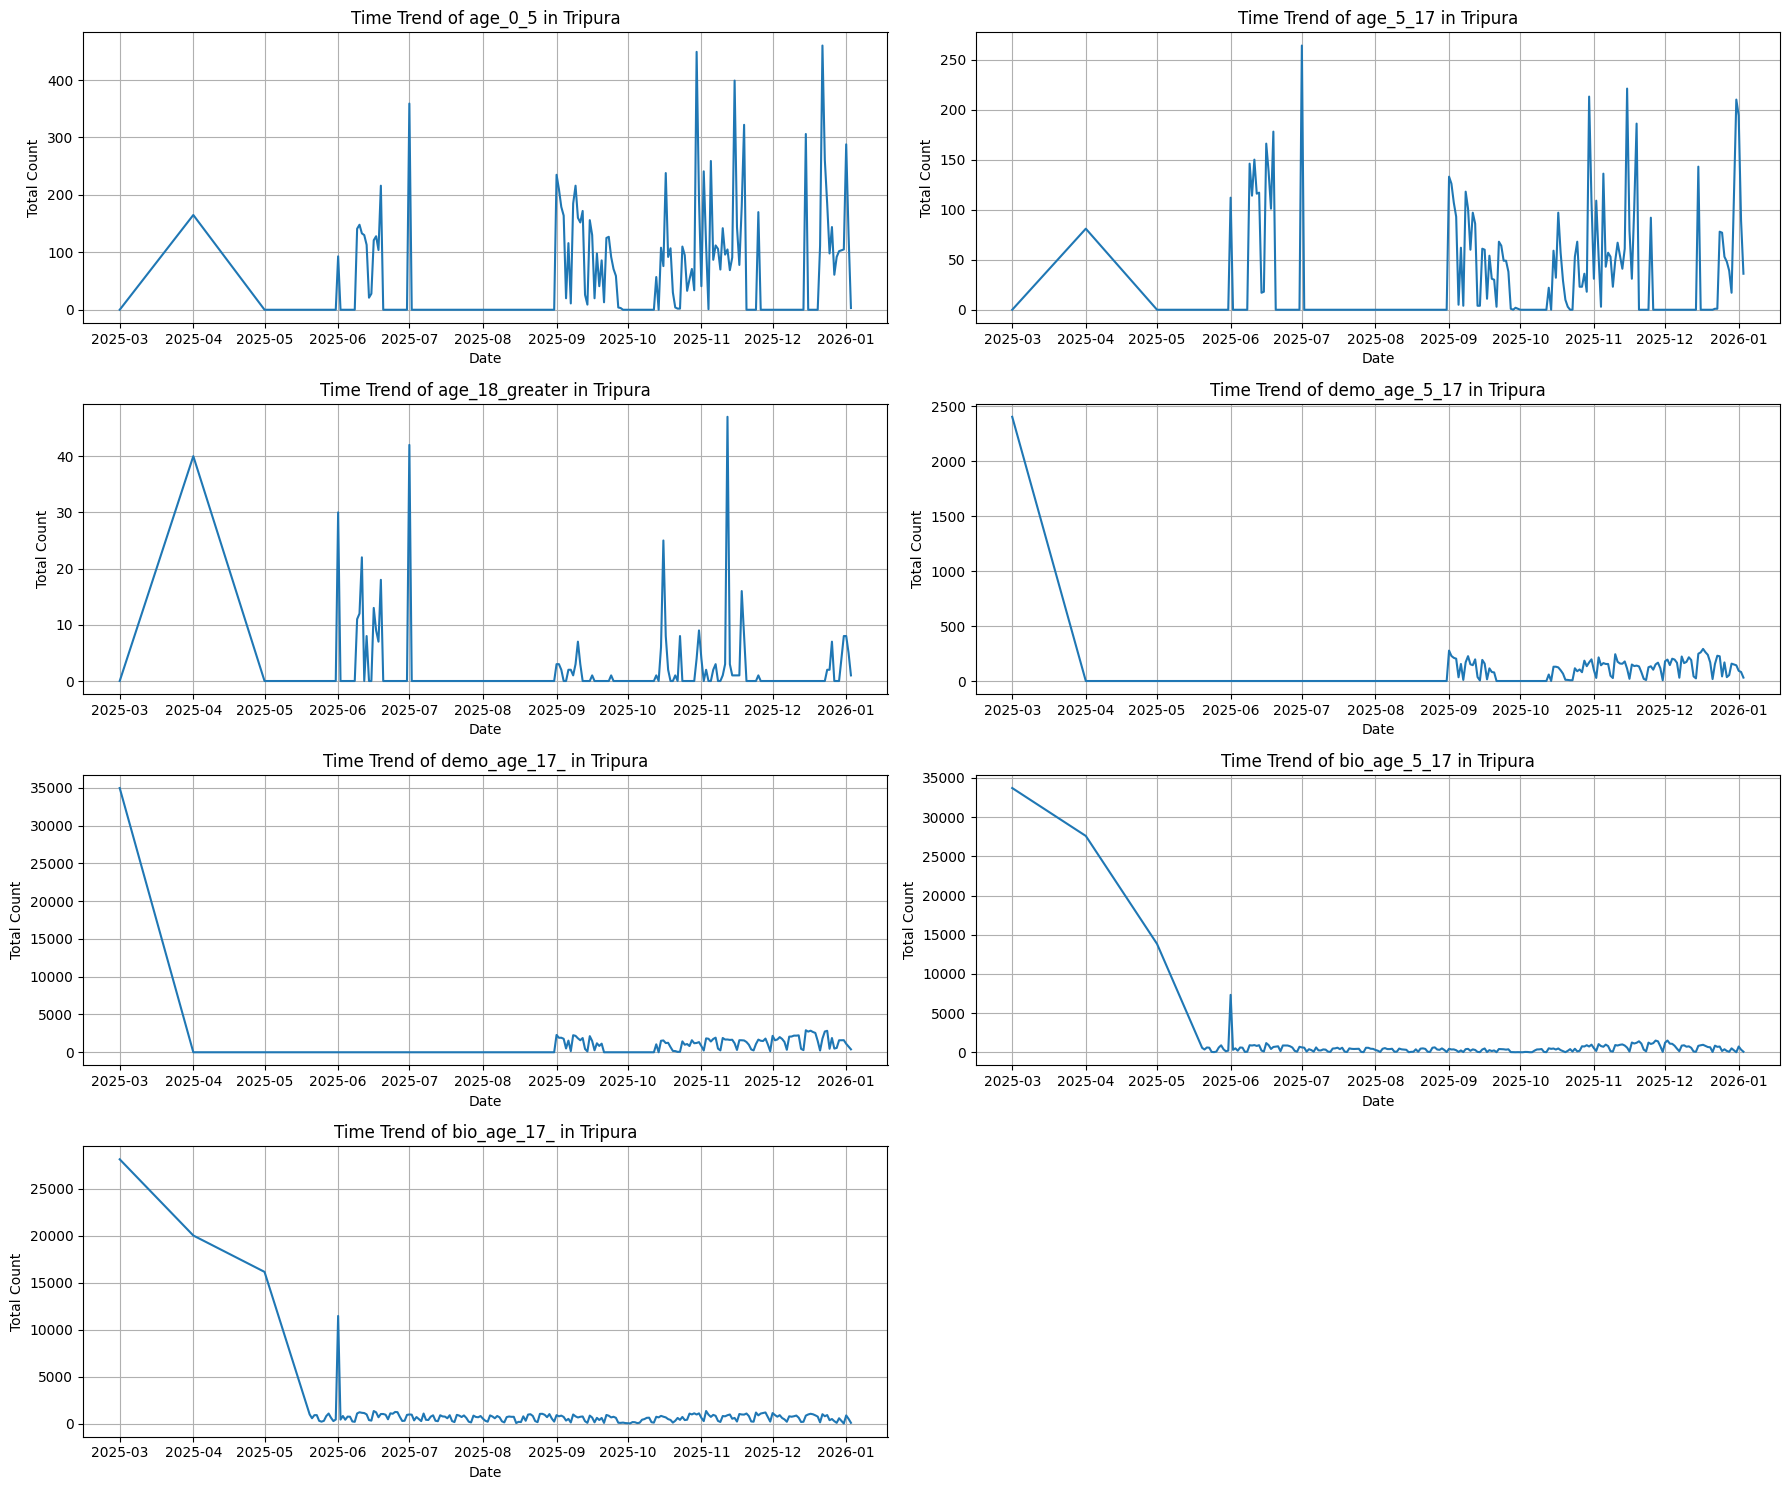

Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [622]:
df_tr_time_trend = df_tr_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date) for Tripura:")
print(df_tr_time_trend.head())
print(df_tr_time_trend.info())
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_tr_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Tripura')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

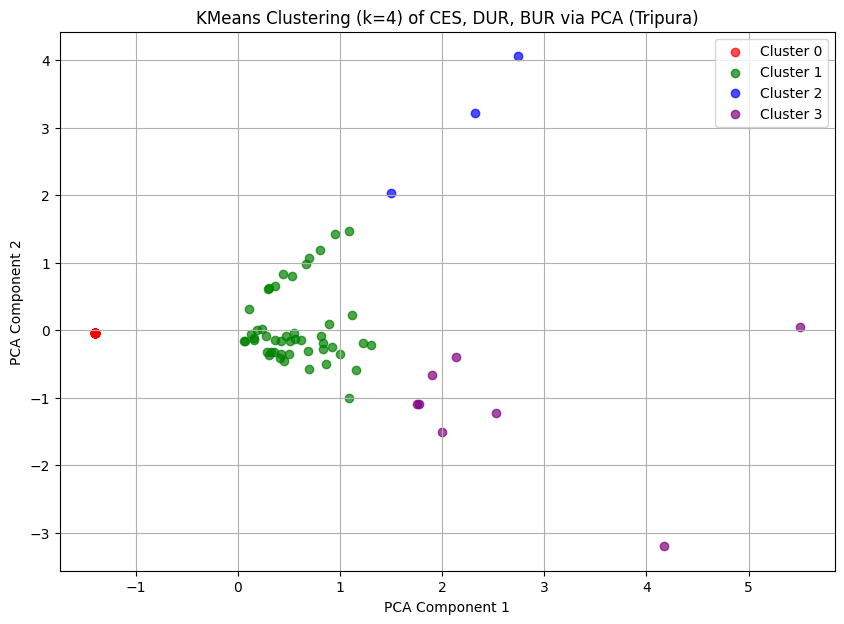

First 5 rows of df_tr_agg with 'clusterlabel' column:
   year  month    state       district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Tripura         Dhalai      0.0       0.0             0.0   
1  2025      3  Tripura      Dhalai  *      0.0       0.0             0.0   
2  2025      3  Tripura         Gomati      0.0       0.0             0.0   
3  2025      3  Tripura         Khowai      0.0       0.0             0.0   
4  2025      3  Tripura  North Tripura      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0          256.0        3675.0        4853.0  ...  0.382300  0.205101   
1            0.0           0.0          30.0  ...  0.001071  0.000357   
2          388.0        3026.0        2597.0  ...  0.157868  0.120076   
3           84.0        1096.0        1656.0  ...  0.101352  0.057098   
4          290.0        3450.0        5036.0  ...  0.469268  0.230317   

       ALBI  Enormrisk  CESrisknorm  DURrisk

In [623]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_tr_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_tr_agg
df_tr_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_tr_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Tripura)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_tr_agg with 'clusterlabel' column:")
print(df_tr_agg.head())

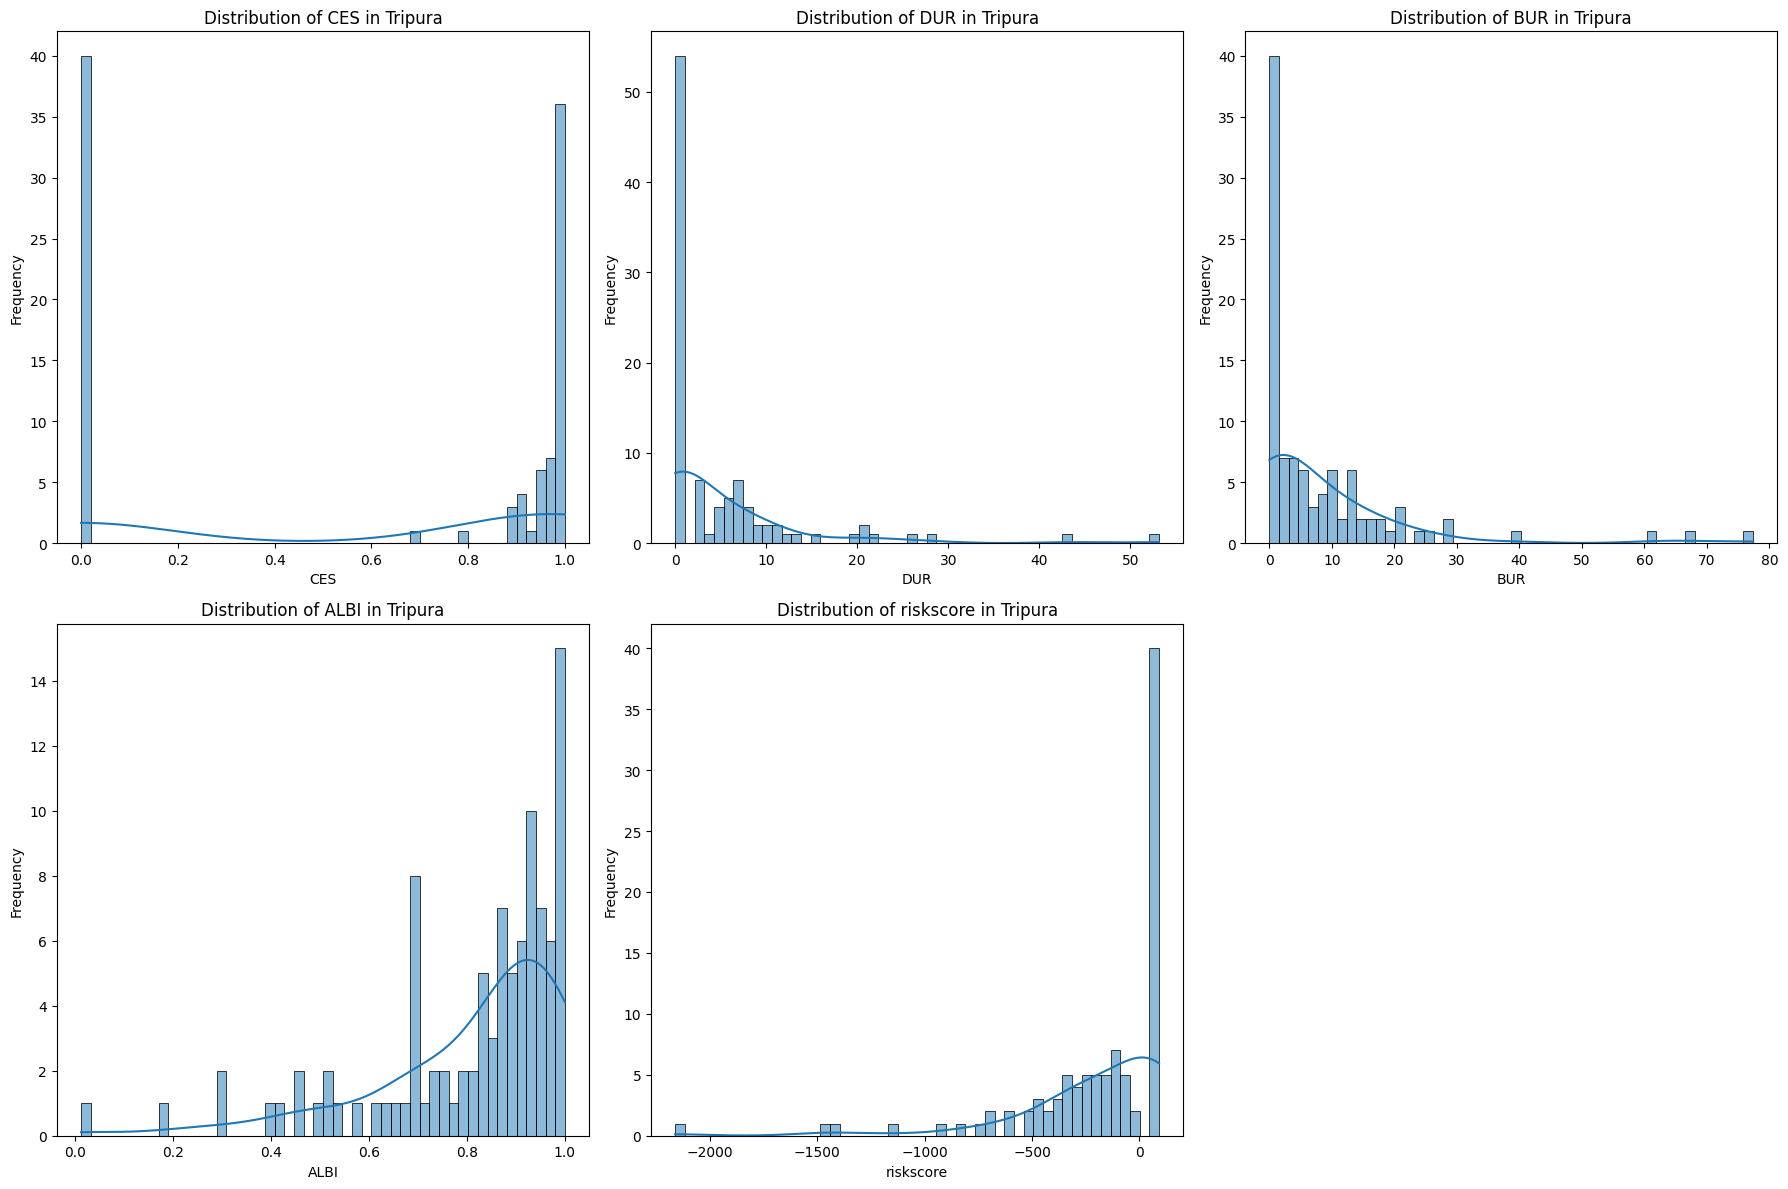

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Tripura.


In [624]:
import seaborn as sns

metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_tr_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Tripura')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Tripura.")

In [625]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_tr_agg['year'].max()
latest_month = df_tr_agg[df_tr_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_tr_agg for the latest year and month
df_latest_month = df_tr_agg[(df_tr_agg['year'] == latest_year) & (df_tr_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
     district      CES
    Dhalai  * 1.000000
      Unakoti 1.000000
       Khowai 1.000000
 West Tripura 0.993671
North Tripura 0.983051
   Sepahijala 0.982906
South Tripura 0.981707
       Dhalai 0.955224
       Gomati 0.945455

Bottom 10 Districts by CES (Year 2026, Month 1):
     district      CES
       Gomati 0.945455
       Dhalai 0.955224
South Tripura 0.981707
   Sepahijala 0.982906
North Tripura 0.983051
 West Tripura 0.993671
       Khowai 1.000000
    Dhalai  * 1.000000
      Unakoti 1.000000

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
     district      DUR
    Dhalai  * 7.000000
       Dhalai 5.298507
 West Tripura 5.025316
South Tripura 2.737805
       Khowai 2.696970
       Gomati 2.581818
   Sepahijala 2.350427
North Tripura 2.169492
      Unakoti 2.146341

Bottom 10 Districts by DUR (Year 2026, Month 1):
     district      DUR
      U

## Summary:

### Data Analysis Key Findings

*   **Data Integration and Preprocessing**: Three separate datasets for Tripura (Enrolment, Demographic, Biometric) were successfully loaded, their 'date' columns standardized to datetime format, and then merged into a single comprehensive DataFrame (`df_tr_merged`). Missing numerical values in the merged data were filled with 0.
*   **Key Performance Indicator (KPI) Calculation**: Various KPIs were computed including `totalenrolments`, `childenrolments`, `totaldemoupdates`, `totalbioupdates`, Child Enrolment Score (CES), Demographic Update Rate (DUR), and Biometric Update Rate (BUR). Division-by-zero scenarios were appropriately handled for rate calculations.
*   **Normalization and Aadhaar Lifecycle Balance Index (ALBI)**: Min-max normalization was applied to total activity metrics (`totalenrolments`, `totaldemoupdates`, `totalbioupdates`) to create `Enorm`, `Dnorm`, and `Bnorm`. These were used to derive a `stdnorm` and the Aadhaar Lifecycle Balance Index (ALBI), which quantifies the balance between enrolment and update activities.
*   **Risk Score Anomaly**: A `riskscore` was calculated from various risk-normalized components. However, consistently negative `riskscore` values were observed across all districts of Tripura (ranging from -24.66 to -152.54 for the latest period), indicating a fundamental issue with its calculation or interpretation, similar to observations in other states.
*   **Monthly Trends**: Time-series plots revealed fluctuations in total enrolments, demographic updates, and biometric updates over time, suggesting varying levels of activity or reporting schedules throughout the years.
*   **Correlation Analysis**: A strong positive correlation was found among age groups within enrolment categories (e.g., `age_0_5` with `age_5_17`) and within update categories (e.g., `demo_age_5_17` with `demo_age_17_`). However, correlations between enrolment and update categories were generally weaker.
*   **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES**: `Dhalai \*`, Unakoti, and Khowai districts showed a perfect CES of 1.0, indicating all enrolments in that period were for children. Gomati (0.945) and Dhalai (0.955) had the lowest, yet still high, CES.
    *   **DUR & BUR Anomaly**: `Dhalai \*` (7.0) and Dhalai (5.29) had the highest DUR, while West Tripura (5.63) and Unakoti (4.29) had the highest BUR. Notably, all DUR and BUR values across districts were greater than 1 (minimum DUR of 2.146 and BUR of 1.606), suggesting that update counts frequently exceeded total enrolments, pointing to potential data discrepancies or definitional issues.
    *   **ALBI**: `Dhalai \*` (1.0), Khowai (0.874), and Unakoti (0.824) displayed the best balance. West Tripura (0.012) and South Tripura (0.289) showed the lowest balance in Aadhaar lifecycle activities.
*   **Clustering Analysis**: Districts were successfully grouped into four clusters based on their CES, DUR, and BUR values using KMeans clustering, with visualization via PCA revealing distinct performance segments.

### Insights or Next Steps

*   **Investigate Data Discrepancies**: Thoroughly examine the calculation and reporting of Demographic Update Rate (DUR) and Biometric Update Rate (BUR), as values consistently exceeding 1 (update counts > total enrolments) suggest data quality issues or a need to refine the metric definitions to align with expected ranges.
*   **Re-evaluate Risk Score Methodology**: The `riskscore` calculation consistently results in negative values, making it uninterpretable and unusable for identifying high-risk areas. The formula and bounding of this metric need to be revisited to provide actionable insights for Aadhaar lifecycle management.
